In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from google.colab import files
from google.colab import drive
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive
!pwd

/content/drive/My Drive
/content/drive/My Drive


In [0]:
data_1 = pd.read_csv("Results/F4_model_data_target_3.csv")
data_1['t'].value_counts()

1    276
3     78
2     66
Name: t, dtype: int64

Trying out a basic CNN model first:


In [0]:
cnn_data = pd.read_csv("/content/drive/My Drive/Results/F4_model_data_500_catex.csv")
#cnn_data = pd.read_csv("/content/drive/My Drive/project/Results/final_all_model_data.csv")
cnn_target = pd.read_csv("/content/drive/My Drive/Results/F4_model_data_target_3.csv")
#cnn_target = pd.read_csv("/content/drive/My Drive/project/Results/final_all_model_target.csv")
cnn_target["t1"] = cnn_target["t"] - 1
cnn_data1 = np.array(cnn_data.values)[:,1:]
cnn_target1 = np.array(cnn_target['t1'].values)

cnn_data_train, cnn_data_test, cnn_target_train, cnn_target_test = train_test_split(cnn_data1, cnn_target1, test_size=0.3, random_state=42)

"""
mlp_data_train1_X=torch.tensor(cnn_data_train.astype(np.float32))
mlp_data_train1_y=torch.tensor(cnn_target_train)
mlp_data_train=TensorDataset(mlp_data_train1_X, mlp_data_train1_y)

mlp_data_test1_X=torch.tensor(cnn_data_test.astype(np.float32))
mlp_data_test1_y=torch.tensor(cnn_target_test)
mlp_data_test=TensorDataset(mlp_data_test1_X, mlp_data_test1_y)
"""


cnn_data_train1 = torch.tensor(cnn_data_train.reshape([cnn_data_train.shape[0],1,cnn_data_train.shape[1]]).astype(np.float32))
cnn_data_test1 = torch.tensor(cnn_data_test.reshape([cnn_data_test.shape[0],1,cnn_data_test.shape[1]]).astype(np.float32))

# cnn_data_train1 = torch.tensor(cnn_data_train.reshape([cnn_data_train.shape[0],cnn_data_train.shape[1],1]).astype(np.float32))
# cnn_data_test1 = torch.tensor(cnn_data_test.reshape([cnn_data_test.shape[0],cnn_data_test.shape[1],1]).astype(np.float32))

cnn_train_dataset = TensorDataset(cnn_data_train1, torch.tensor(cnn_target_train))
cnn_test_dataset = TensorDataset(cnn_data_test1, torch.tensor(cnn_target_test))

In [0]:
# def load_dataset(raw_data, model_type):
#     #raw_data= pd.read_csv(path)
#     Y=np.array(target)
#     Y=Y-1
#     #Y=Y.astype(np.float32)
#     del raw_data['y']
#     X=raw_data.to_numpy()
#     X=X.astype(np.float32)
#     if model_type == 'MLP':
#         data = torch.tensor(X)
#         target = torch.tensor(Y)
#         dataset = TensorDataset(data, target)
#     elif model_type == 'CNN':
#         data = torch.from_numpy(X).unsqueeze(1)
#         #torch.tensor(X.unsqueeze(1))
#         target = torch.tensor(Y)
#         dataset = TensorDataset(data, target)
#     elif model_type == 'RNN':
#         data = torch.from_numpy(X).unsqueeze(2)
#         target = torch.tensor(Y)
#         dataset = TensorDataset(data, target)
#     else:
#         raise AssertionError("Wrong Model Type!")
#     return dataset

SyntaxError: ignored

In [23]:
cnn_data_train1.shape

torch.Size([294, 1, 556])

In [0]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
from torch.autograd import Variable
"""
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv1d(1,6,4)  #unimproved model
        self.conv2 = nn.Conv1d(6,16,4)  #unimproved model
        self.conv3 = nn.Conv1d(16,32,4)  #unimproved model
        self.rel = nn.ReLU()  #unimproved model
        self.max_pool = nn.MaxPool1d(2)  #unimproved model
        self.layer1 = nn.Linear(32*1083, 1024)
        self.layer2 = nn.Linear(1024, 128)
          #unimproved model
        self.layer3 = nn.Linear(128,4)  #unimproved model
        #self.dropout = nn.Dropout(0.2)  #improved model

    def forward(self, x):
        # x = self.max_pool(self.rel(self.conv1(x)))  #unimproved model
        # x = self.max_pool(self.rel(self.conv2(x)))  #unimproved model
        # x = x.view(-1, 656)  #unimproved model
        # x = self.rel(self.layer1(x))  #unimproved model
        # x = self.layer2(x)  #unimproved model
        x = self.max_pool(self.rel(self.conv1(x)))  #improved model
        x = self.max_pool(self.rel(self.conv2(x)))  #improved model
        x = self.max_pool(self.rel(self.conv3(x)))
        x = x.view(-1, 32*1083)  #improved model
        x = F.relu(self.layer1(x))  #improved model
        x=F.relu(self.layer2(x))
        x = self.layer3(x)  #improved model
        return x
"""

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv1d(1,6,5)
        self.rel = nn.ReLU()
        self.max_pool = nn.MaxPool1d(2)
        self.layer1 = nn.Linear(6*276, 4)

    def forward(self, x):
        x = self.max_pool(self.rel(self.conv1(x)))
        x = x.view(-1, 6*276)
        x = self.layer1(x)
        return x

class MyCRNN(nn.Module):
    def __init__(self):
        super(MyCRNN, self).__init__()
        #self.conv1 = nn.Conv1d(1,6,5)
        self.conv1 = nn.Conv1d(1,1,5)
        self.rel = nn.ReLU()
        self.max_pool = nn.MaxPool1d(2)
        self.layer_gru = nn.GRU(input_size=1, hidden_size=16, num_layers=1, batch_first=True, dropout=0.2)
        self.layer1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.max_pool(self.rel(self.conv1(x)))
        x = x.view(x.shape[0], x.shape[2], x.shape[1])
        x, _ = self.layer_gru(x)
        x = self.layer1(x[:,-1,:])
        return x

class MyRNN(nn.Module):
    def __init__(self):
        super(MyRNN, self).__init__()
        # self.layer1 = nn.GRU(input_size=1, hidden_size=16, num_layers=1, batch_first=True)  #unimproved model
        # self.layer2 = nn.Linear(16,5)  #unimproved model
        self.layer1 = nn.GRU(input_size=1, hidden_size=16, num_layers=1, batch_first=True, dropout=0.2)  #improved model
        self.layer2 = nn.Linear(16,3)  #improved model
        self.rel = nn.ReLU()  #improved model

    def forward(self, x):
        x, _ = self.layer1(x)  #unimproved model
        x = self.rel(x[:,-1,:])  #improved model
        x = self.layer2(x)  #unimproved model
        return x

In [0]:
class MyMLP(nn.Module):
    def __init__(self):
        super(MyMLP, self).__init__()
        self.hidden1 = nn.Linear(8686, 128)
        #self.hidden2 = nn.Linear(128,16)
        #self.hidden4 = nn.Linear(64,16)        
        self.out = nn.Linear(128, 4)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = F.leaky_relu(self.dropout(self.hidden1(x)))
        #x = F.relu(self.hidden2(x))
        #x = F.relu(self.hidden4(x))
        x = self.out(x)
        return x

In [0]:
class AverageMeter(object):
	"""Computes and stores the average and current value"""

	def __init__(self):
		self.reset()

	def reset(self):
		self.val = 0
		self.avg = 0
		self.sum = 0
		self.count = 0

	def update(self, val, n=1):
		self.val = val
		self.sum += val * n
		self.count += n
		self.avg = self.sum / self.count

def compute_batch_accuracy(output, target):
	"""Computes the accuracy for a batch"""
	with torch.no_grad():

		batch_size = target.size(0)
		_, pred = output.max(1)
		correct = pred.eq(target).sum()

		return correct * 100.0 / batch_size

def train(model, device, data_loader, criterion, optimizer, epoch, print_freq=10):
	batch_time = AverageMeter()
	data_time = AverageMeter()
	losses = AverageMeter()
	accuracy = AverageMeter()

	model.train()

	end = time.time()
	for i, (input, target) in enumerate(data_loader):
		# measure data loading time
		data_time.update(time.time() - end)

		if isinstance(input, tuple):
			input = tuple([e.to(device) if type(e) == torch.Tensor else e for e in input])
		else:
			input = input.to(device)
		target = target.to(device)

		optimizer.zero_grad()
		output = model(input)
		loss = criterion(output, target)
		assert not np.isnan(loss.item()), 'Model diverged with loss = NaN'

		loss.backward()
		optimizer.step()

		# measure elapsed time
		batch_time.update(time.time() - end)
		end = time.time()

		losses.update(loss.item(), target.size(0))
		accuracy.update(compute_batch_accuracy(output, target).item(), target.size(0))

		if i % print_freq == 0:
			print('Epoch: [{0}][{1}/{2}]\t'
				  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
				  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
				  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
				  'Accuracy {acc.val:.3f} ({acc.avg:.3f})'.format(
				epoch, i, len(data_loader), batch_time=batch_time,
				data_time=data_time, loss=losses, acc=accuracy))

	return losses.avg, accuracy.avg



def evaluate(model, device, data_loader, criterion, print_freq=10):
	batch_time = AverageMeter()
	losses = AverageMeter()
	accuracy = AverageMeter()

	results = []

	model.eval()

	with torch.no_grad():
		end = time.time()
		for i, (input, target) in enumerate(data_loader):

			if isinstance(input, tuple):
				input = tuple([e.to(device) if type(e) == torch.Tensor else e for e in input])
			else:
				input = input.to(device)
			target = target.to(device)

			output = model(input)
			loss = criterion(output, target)

			# measure elapsed time
			batch_time.update(time.time() - end)
			end = time.time()

			losses.update(loss.item(), target.size(0))
			accuracy.update(compute_batch_accuracy(output, target).item(), target.size(0))

			y_true = target.detach().to('cpu').numpy().tolist()
			y_pred = output.detach().to('cpu').max(1)[1].numpy().tolist()
			results.extend(list(zip(y_true, y_pred)))

			if i % print_freq == 0:
				print('Test: [{0}/{1}]\t'
					  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
					  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
					  'Accuracy {acc.val:.3f} ({acc.avg:.3f})'.format(
					i, len(data_loader), batch_time=batch_time, loss=losses, acc=accuracy))

	return losses.avg, accuracy.avg, results

In [25]:
import time
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

NUM_EPOCHS = 10
BATCH_SIZE = 4
USE_CUDA = True  # Set 'True' if you want to use GPU
NUM_WORKERS = 0  # Number of threads used by DataLoader. You can adjust this according to your machine spec.

device = torch.device("cuda" if USE_CUDA and torch.cuda.is_available() else "cpu")
torch.manual_seed(1)
if device.type == "cuda":
	torch.backends.cudnn.deterministic = True
	torch.backends.cudnn.benchmark = False


train_loader = torch.utils.data.DataLoader(cnn_train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(cnn_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
"""
train_loader = torch.utils.data.DataLoader(mlp_data_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(mlp_data_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
"""
#change here
model = MyCNN()
#model = MyMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion.to(device)

best_val_acc = 0.0
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []

for epoch in range(NUM_EPOCHS):
	train_loss, train_accuracy = train(model, device, train_loader, criterion, optimizer, epoch)
	valid_loss, valid_accuracy, valid_results = evaluate(model, device, valid_loader, criterion)

	train_losses.append(train_loss)
	valid_losses.append(valid_loss)

	train_accuracies.append(train_accuracy)
	valid_accuracies.append(valid_accuracy)

	is_best = valid_accuracy > best_val_acc  # let's keep the model that has the best accuracy, but you can also use another metric.
	if is_best:
		best_val_acc = valid_accuracy

Epoch: [0][0/74]	Time 0.005 (0.005)	Data 0.000 (0.000)	Loss 1.5801 (1.5801)	Accuracy 0.000 (0.000)
Epoch: [0][10/74]	Time 0.002 (0.003)	Data 0.000 (0.000)	Loss 1.0168 (1.2945)	Accuracy 50.000 (34.091)
Epoch: [0][20/74]	Time 0.002 (0.003)	Data 0.000 (0.000)	Loss 1.4965 (1.1299)	Accuracy 25.000 (47.619)
Epoch: [0][30/74]	Time 0.002 (0.002)	Data 0.000 (0.000)	Loss 0.5198 (1.0236)	Accuracy 100.000 (55.645)
Epoch: [0][40/74]	Time 0.002 (0.002)	Data 0.000 (0.000)	Loss 1.8874 (1.0245)	Accuracy 25.000 (57.317)
Epoch: [0][50/74]	Time 0.002 (0.002)	Data 0.000 (0.000)	Loss 0.4613 (0.9974)	Accuracy 100.000 (58.333)
Epoch: [0][60/74]	Time 0.002 (0.002)	Data 0.000 (0.000)	Loss 0.4743 (0.9609)	Accuracy 75.000 (60.246)
Epoch: [0][70/74]	Time 0.002 (0.002)	Data 0.000 (0.000)	Loss 0.8100 (0.9211)	Accuracy 75.000 (62.676)
Test: [0/32]	Time 0.001 (0.001)	Loss 0.1844 (0.1844)	Accuracy 100.000 (100.000)
Test: [10/32]	Time 0.001 (0.001)	Loss 1.6338 (0.8317)	Accuracy 25.000 (61.364)
Test: [20/32]	Time 0.001 (

In [27]:
train_accuracies

[63.265306122448976,
 70.06802721088435,
 70.06802721088435,
 75.17006802721089,
 73.80952380952381,
 75.51020408163265,
 79.93197278911565,
 81.97278911564626,
 82.31292517006803,
 83.6734693877551]

In [0]:
def plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies):
  plt.plot(train_losses, 'C0', label='Training loss')
  plt.plot(valid_losses, 'C1', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.savefig('Training and Validation loss.png')
  plt.show()
  plt.plot(train_accuracies, 'C0', label='Training accuracy')
  plt.plot(valid_accuracies, 'C1', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig('Training and Validation Accuracy.png')
  plt.show()
    
  pass

In [0]:
def plot_confusion_matrix(results, class_names):
    actual_y, pred_y = zip(* results)
    cm = confusion_matrix(actual_y, pred_y)
    #disp = cmd(confusion_matrix=cm,display_labels=class_names)
    #disp = disp.plot(include_values=True,cmap=charts.cm.Blues)
    #plt.show()
    def cmd(cm,labels):
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        n_classes = cm.shape[0]
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xticks(np.arange(n_classes), labels, rotation = 45)
        plt.yticks(np.arange(n_classes), labels)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        thres = (cm.min()+cm.max())/ 2.0
        for i, j in product(range(n_classes), range(n_classes)):
            plt.text(j,i,format(cm[i,j],".2f"),ha="center", va="center",color="white" if cm[i,j]>thres else "black")
        plt.tight_layout()
        plt.savefig("connfusion_matrix.png")
        plt.show()
    cmd(cm,class_names)

In [0]:
from sklearn.metrics import confusion_matrix, f1_score
from itertools import product
import numpy as np

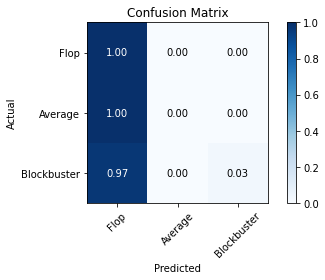

In [30]:
#class_names = ['Flop', 'Below Average', 'Hit', 'Blockbuster']
class_names = ['Flop', 'Average', 'Blockbuster']
plot_confusion_matrix(valid_results, class_names)

In [0]:
y_test = [i[0] for i in valid_results]
y_pred = [i[1] for i in valid_results]
f1score = f1_score(y_test, y_pred, average=None)
f1score

array([0.74626866, 0.        , 0.        ])

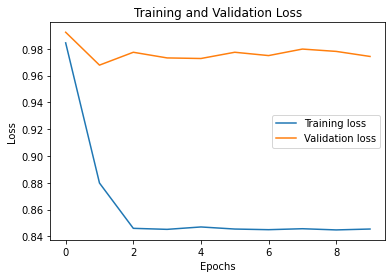

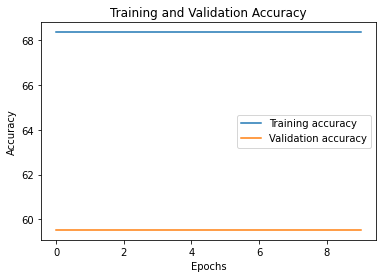

In [16]:
import matplotlib.pyplot as plt
plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [0]:
!cat /proc/meminfo

MemTotal:       13335188 kB
MemFree:         8943680 kB
MemAvailable:   12392320 kB
Buffers:          110452 kB
Cached:          2518984 kB
SwapCached:            0 kB
Active:           880684 kB
Inactive:        3250076 kB
Active(anon):     507940 kB
Inactive(anon):      324 kB
Active(file):     372744 kB
Inactive(file):  3249752 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               460 kB
Writeback:             0 kB
AnonPages:       1501216 kB
Mapped:           368896 kB
Shmem:               880 kB
Slab:             167620 kB
SReclaimable:     134216 kB
SUnreclaim:        33404 kB
KernelStack:        4256 kB
PageTables:         9260 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667592 kB
Committed_AS:    4293820 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:     98304 kB
ShmemHugePages:  